In [1]:
library(AER)
library(MASS)

Warning message:
“package ‘AER’ was built under R version 3.5.2”Loading required package: car
Loading required package: carData
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: survival


In [2]:
#createing sample data 

STR<-c(15,17,19,20,22,23.5,25)
TestScore<-c(680,640,670,660,630,660,635)

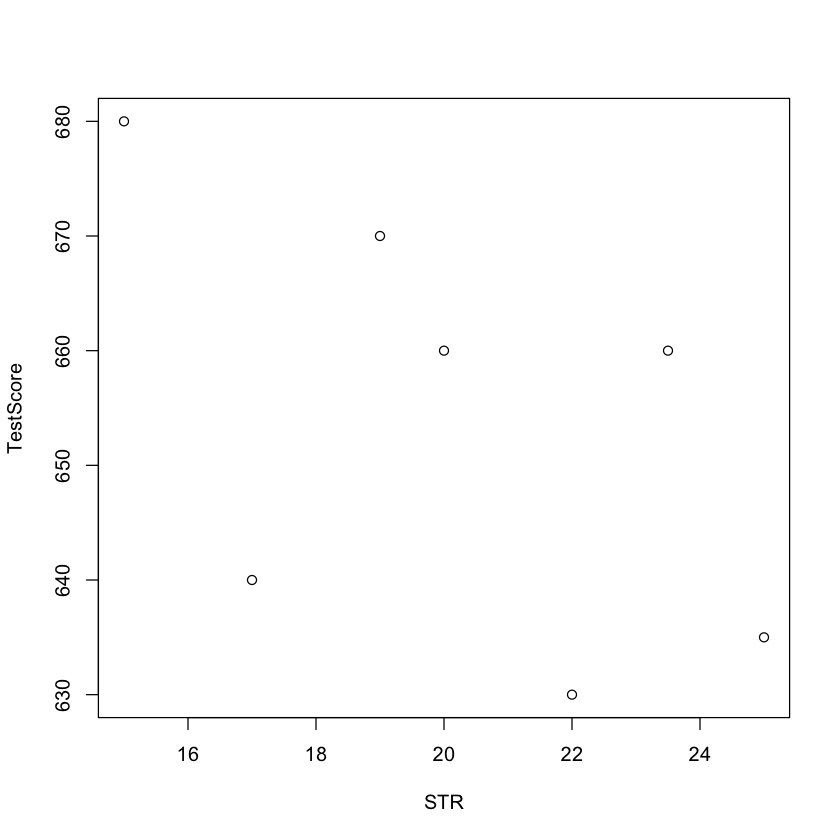

In [3]:
#create a scatterplot of the data 

plot(TestScore~STR)

In [4]:
# loading the data set in thw workspace of california school it comes with AER library  

data(CASchools)

In [5]:
# overview of data

head(CASchools)

district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
75119,Sunol Glen Unified,Alameda,KK-08,195,10.90,0.5102,2.0408,67,6384.911,22.690001,0.000000,691.6,690.0
61499,Manzanita Elementary,Butte,KK-08,240,11.15,15.4167,47.9167,101,5099.381,9.824000,4.583333,660.5,661.9
61549,Thermalito Union Elementary,Butte,KK-08,1550,82.90,55.0323,76.3226,169,5501.955,8.978000,30.000002,636.3,650.9
61457,Golden Feather Union Elementary,Butte,KK-08,243,14.00,36.4754,77.0492,85,7101.831,8.978000,0.000000,651.9,643.5
61523,Palermo Union Elementary,Butte,KK-08,1335,71.50,33.1086,78.4270,171,5235.988,9.080333,13.857677,641.8,639.9
62042,Burrel Union Elementary,Fresno,KK-08,137,6.40,12.3188,86.9565,25,5580.147,10.415000,12.408759,605.7,605.4


In [6]:
#compute STR and append it to CASchools 

CASchools$STR <- CASchools$students/CASchools$teachers

# compute TestScore and append it to CASchools
CASchools$score <- (CASchools$read + CASchools$math)/2

In [7]:
#again do head(CASchools and see two new variables are added)

head(CASchools)

district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,STR,score
75119,Sunol Glen Unified,Alameda,KK-08,195,10.90,0.5102,2.0408,67,6384.911,22.690001,0.000000,691.6,690.0,17.88991,690.80
61499,Manzanita Elementary,Butte,KK-08,240,11.15,15.4167,47.9167,101,5099.381,9.824000,4.583333,660.5,661.9,21.52466,661.20
61549,Thermalito Union Elementary,Butte,KK-08,1550,82.90,55.0323,76.3226,169,5501.955,8.978000,30.000002,636.3,650.9,18.69723,643.60
61457,Golden Feather Union Elementary,Butte,KK-08,243,14.00,36.4754,77.0492,85,7101.831,8.978000,0.000000,651.9,643.5,17.35714,647.70
61523,Palermo Union Elementary,Butte,KK-08,1335,71.50,33.1086,78.4270,171,5235.988,9.080333,13.857677,641.8,639.9,18.67133,640.85
62042,Burrel Union Elementary,Fresno,KK-08,137,6.40,12.3188,86.9565,25,5580.147,10.415000,12.408759,605.7,605.4,21.40625,605.55


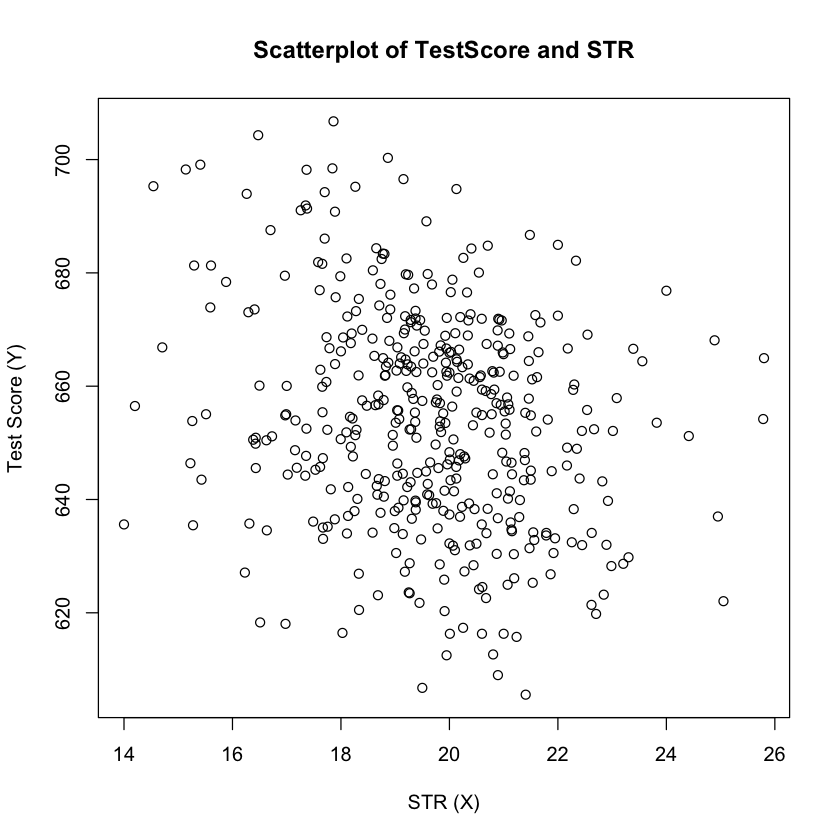

In [8]:
#For the sample data we use scatter plot to see if there are any outlier
# in this example we see the points are strongly and negatively correlated. 
## that is, we expect to observe lower test scores in bigger classes. 


plot(score ~ STR,
     data = CASchools,
     main = "Scatterplot of TestScore and STR",
     xlab = "STR (X)",
     ylab = "Test Score (Y)")

In [9]:
# to see the correlations 

cor(CASchools$STR, CASchools$score)

[1] -0.2263627

In [10]:
# estimating the model using the lm function 

linear_model <- lm(score ~ STR, data = CASchools)

In [11]:
# print the standard output of the estimated lm object to the console
linear_model


Call:
lm(formula = score ~ STR, data = CASchools)

Coefficients:
(Intercept)          STR  
     698.93        -2.28  


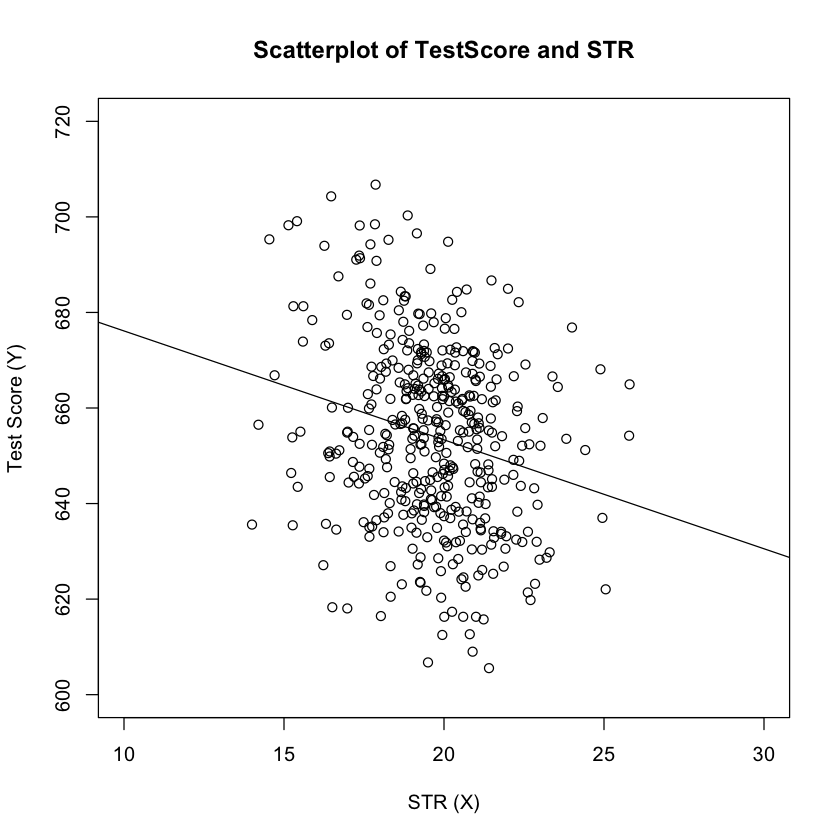

In [14]:
# plot the data
plot(score ~ STR,
     data = CASchools,
     main = "Scatterplot of TestScore and STR",
     xlab = "STR (X)",
     ylab = "Test Score (Y)",
     xlim = c(10, 30),
     ylim = c(600, 720))
abline(linear_model)

In [13]:
# add the regression line
abline(linear_model)

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


In [15]:
#measures of fit 

# after fitting a linear regression model, a natural question is how well the model describes the data. 
# visually this amounts whether the observations are tightly clustered around the regression line. 
#both the coefficient of determination and standard error of the regression measure how well the OLS Regression line fits the data. 

mod_summary<-summary(linear_model)

In [20]:
mod_summary


Call:
lm(formula = score ~ STR, data = CASchools)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.727 -14.251   0.483  12.822  48.540 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 698.9329     9.4675  73.825  < 2e-16 ***
STR          -2.2798     0.4798  -4.751 2.78e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.58 on 418 degrees of freedom
Multiple R-squared:  0.05124,	Adjusted R-squared:  0.04897 
F-statistic: 22.58 on 1 and 418 DF,  p-value: 2.783e-06


In [17]:
# compute R^2 manually
SSR <- sum(mod_summary$residuals^2)

TSS <- sum((CASchools$score - mean(CASchools$score))^2)

R2 <- 1 - SSR/TSS

In [18]:
# print the value to the console
R2

[1] 0.05124009

In [19]:
# compute SER manually

n <- nrow(CASchools)

SER <- sqrt(SSR / (n-2))

# print the value to the console
SER

[1] 18.58097

In [1]:
setwd("~/Library/Mobile Documents/com~apple~CloudDocs/subjects/financial econometrics/data/5e_data_sets")

In [2]:
# results on inflation and unemployment data of USA 

a<-read.csv("table2.csv",header=T)

In [3]:
# to see the summary of data 

summary(a)

      Year         INFLRATE          UNRATE     
 Min.   :1960   Min.   : 1.003   Min.   :3.500  
 1st Qu.:1972   1st Qu.: 2.428   1st Qu.:4.900  
 Median :1983   Median : 3.226   Median :5.600  
 Mean   :1983   Mean   : 4.242   Mean   :5.868  
 3rd Qu.:1994   3rd Qu.: 5.431   3rd Qu.:6.850  
 Max.   :2006   Max.   :13.499   Max.   :9.700  

In [4]:
# to see the correlations 

cor(a$UNRATE, a$INFLRATE)

[1] 0.2906527

In [5]:
# to model unemployment rate on inflation 

b<-lm(UNRATE~INFLRATE,data=a)

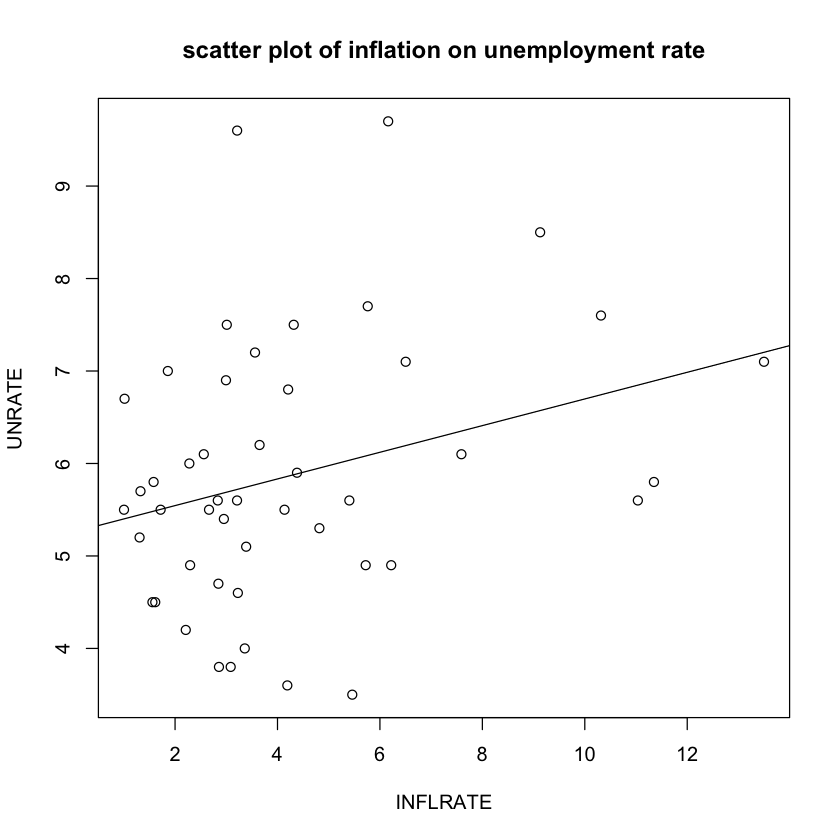

In [8]:
# to plot the data 

plot(UNRATE~INFLRATE,data=a, main="scatter plot of inflation on unemployment rate")
# add the regression line
abline(b)

In [9]:
summary(b)


Call:
lm(formula = UNRATE ~ INFLRATE, data = a)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5438 -0.9849 -0.1192  0.8808  3.8805 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.25621    0.36157  14.537   <2e-16 ***
INFLRATE     0.14424    0.07079   2.038   0.0475 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.381 on 45 degrees of freedom
Multiple R-squared:  0.08448,	Adjusted R-squared:  0.06413 
F-statistic: 4.152 on 1 and 45 DF,  p-value: 0.04748


In [10]:
res<-resid(b)

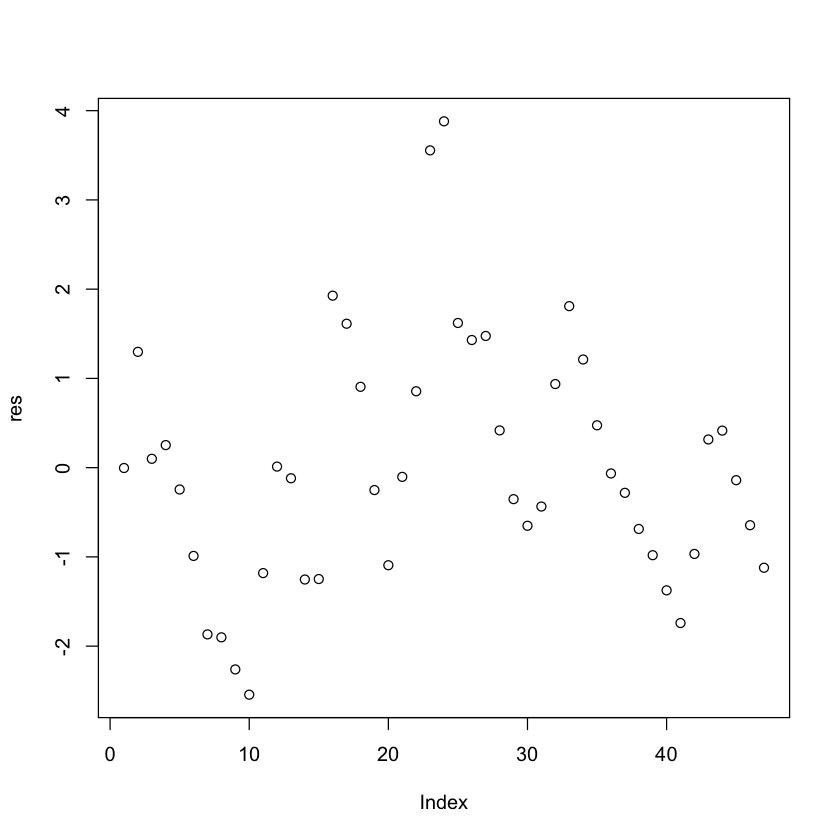

In [11]:
# to test the assumption of OLS that residuals are randomly distributed. 


# plotting the residuals
plot(res)

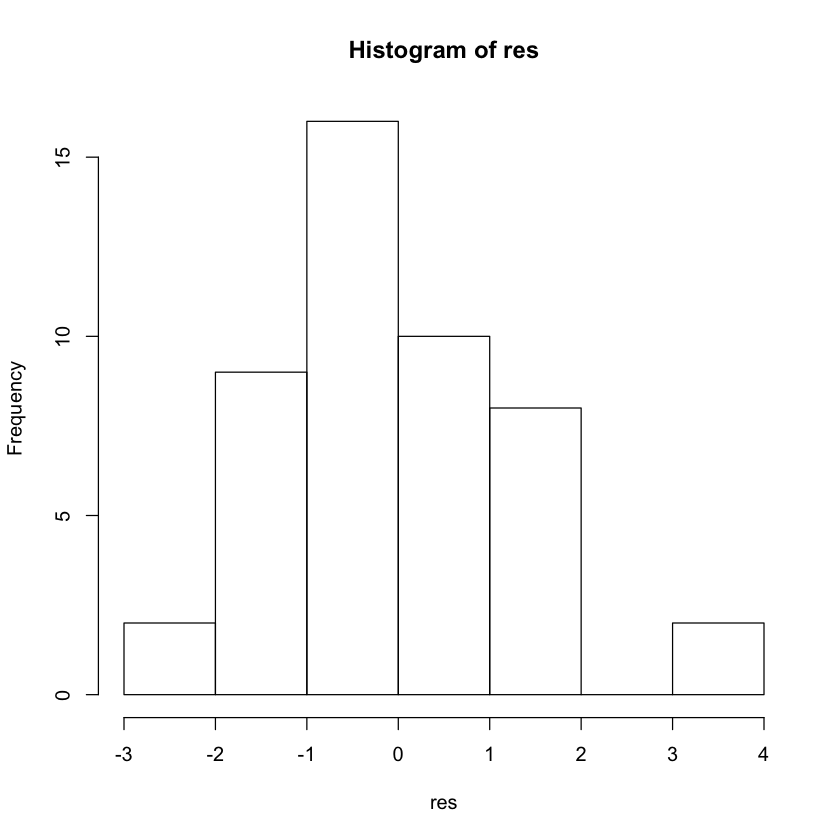

In [12]:
# plotting the histogram 

hist(res)

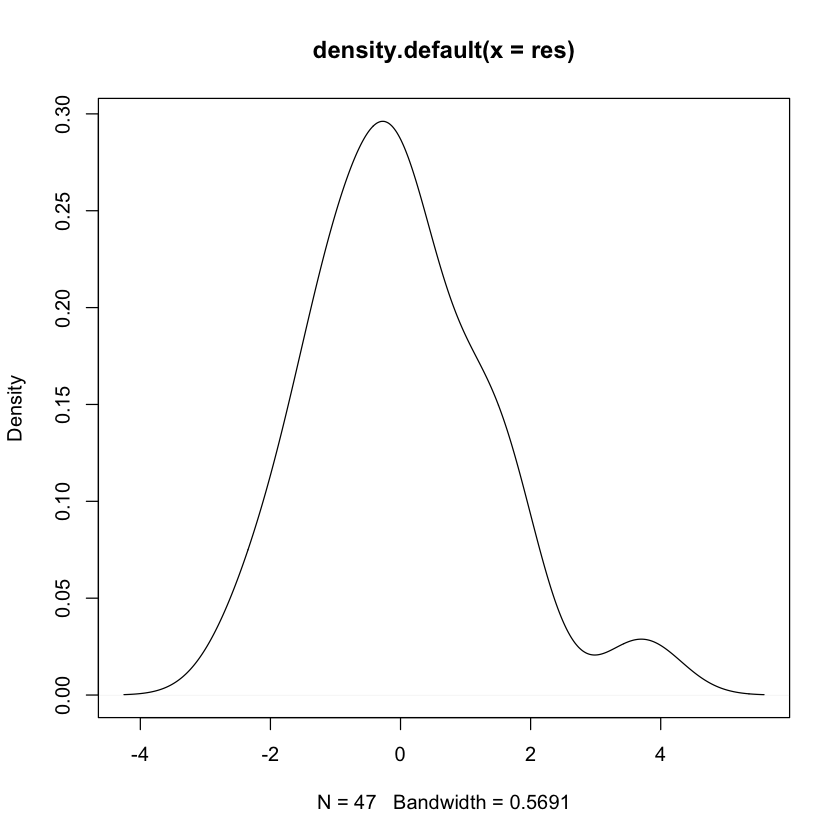

In [14]:
# normalizing plot 

d <- density(res)
plot(d)

In [15]:
# Jarque Bera test 

In [16]:
library(tseries)

jarque.bera.test(res)


	Jarque Bera Test

data:  res
X-squared = 4.0185, df = 2, p-value = 0.1341
